

---


# ***Disease Risk from Daily Habits - Practice Dataset***

This dataset contains detailed lifestyle and biometric information from 100,000 individuals. The goal is to predict the likelihood of having a disease based on habits, health metrics, demographics, and psychological indicators.

**Source**: [Disease Risk from Daily Habits - Kaggle](https://www.kaggle.com/datasets/mahdimashayekhi/disease-risk-from-daily-habits)

The dataset is composed by categorical and numerical columns, some of them have missing values. The target is a binary classification that indicates whether an individual is diagnosed with a certain disease or not. The classification is based on medical and lifestyle indicators derived from the individual´s profile.

0.   healthy
1.   diseased

The dataset is imbalanced, ~70% healthy, ~30% diseased.









---


## **Numerical Features**

Some of the numerical features in the dataset are:

*   age: Age of the individual
*   bmi: Body Mass Index
*   blood_pressure: Systolic blood pressure (mm/Hg)
*   cholesterol: Cholesterol level (mg/Hg)
*   heart_rate: Resting heart rate (bpm)
*   glucose: Blood glucose level
*   insulin: Blood insulin level
*   calorie_intake: Daily average calorie consumption
*   sugar_intake: Daily sugar intake (gr)
*   screen_time: Daily screen time (hrs)
*   stress_level: Self reported stress level (0 - 10 level)
*   mental_health_score: Self reported mental well being score (0 - 10 level)








## **Categorical Features**


Some of the categorical features in the dataset are:

*   gender: Male / Female
*   maritual_status: single, married, divorced, widowed
*   diet_type: vegan, vegetarian, omnivore, keto, paleo
*   occupation: Job type or employment status
*   sleep_quality: Subjective sleep quality
*   mental_health_support: Access to mental health resources
*   excercise_type: none, cardio, strength, mixed
*   device_usage: Device usage level
*   healthcare_acces: Ease of access to healthcare
*   insurance: Has insurance or not
*   family_history: Family history of disease
*   Sunlight_exposure: Daily sunlight exposure (low/med/high)
*   pet_owner: Owns pets (yes - no)
*   caffeine_intake: Caffeine consumption level
*   meals_per_day: Number of meals consumed per day


In [1]:
# Importing the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [5]:
# Loading the dataset and displaying the first 5 rows

health_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks - Data science practice/health_lifestyle_classification.csv')
display(health_data.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks - Data science practice/health_lifestyle_classification.csv'

In [5]:
# Knowing the columns with missing values and the value types

display(health_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

None

# **Data cleaning**

Based on the info of the data set, there are different columns with missing values, a further check in those values is made in here.

## **Dealing with missing data in categorical fields**

In [6]:
## Checking the amount of missing values in each field

missing_values = health_data.isna().sum().sort_values(ascending = False)
display(missing_values[missing_values > 1]) # Display just the fields with missing values, exclude the rest

,0
alcohol_consumption,42387
caffeine_intake,33261
exercise_type,24969
insulin,15836
heart_rate,14003
gene_marker_flag,10474
income,8470
daily_steps,8329
blood_pressure,7669


In the dataset, there are 9 fields with missing data. Since none of these fields are missing less than 5% of the total observations, we will not drop any data to handle the missing values.

The first field to take care of is the "alcohol_consumption" field. Due to the fact that over 40% of it's data is missing.

In [7]:
# Behaviour of the field over the target variable
health_data.groupby('target')['alcohol_consumption'].value_counts(normalize = True)

target    alcohol_consumption
diseased  Occasionally           0.501407
          Regularly              0.498593
healthy   Occasionally           0.500012
          Regularly              0.499988
Name: proportion, dtype: float64

Across the entire dataset, the distribution of individuals who consume alcohol "Occasionally" or "Regularly" is similar within both the 'healthy' and 'diseased' target groups, with approximately 50% in each alcohol consumption category for both targets. Given this balanced distribution and the variable's importance for the model, we will address the missing values through imputation.

To avoid any synthetic skews in the data the imputation will be made with the string "Unknown". Also, the missing values could mean that the individuals didn´t respond because they don´t consume alcohol. The same approach will be made with the remaining categorical variables: *caffeine intake, exercise type*

In [8]:
# Filling missing values in alcohol consumption
health_data['alcohol_consumption'].fillna('Unknown', inplace = True)
health_data['caffeine_intake'].fillna('Unknown', inplace = True)
health_data['exercise_type'].fillna('Unknown', inplace = True)


/tmp/ipython-input-1377831448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  health_data['alcohol_consumption'].fillna('Unknown', inplace = True)
/tmp/ipython-input-1377831448.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

## **Dealing with missing data in numerical fields**

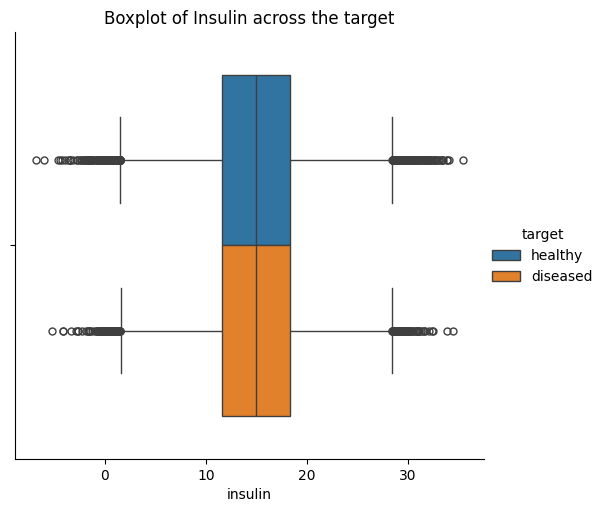

In [9]:
sns.catplot(kind = 'box',
            hue = 'target',
            x = 'insulin',
            data = health_data)
plt.title('Boxplot of Insulin across the target')
plt.show()

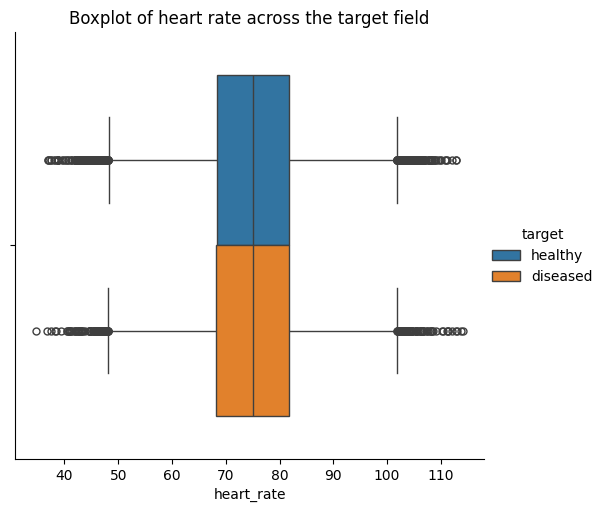

In [10]:
sns.catplot(kind = 'box',
            hue = 'target',
            x = 'heart_rate',
            data = health_data)
plt.title('Boxplot of heart rate across the target field')
plt.show()

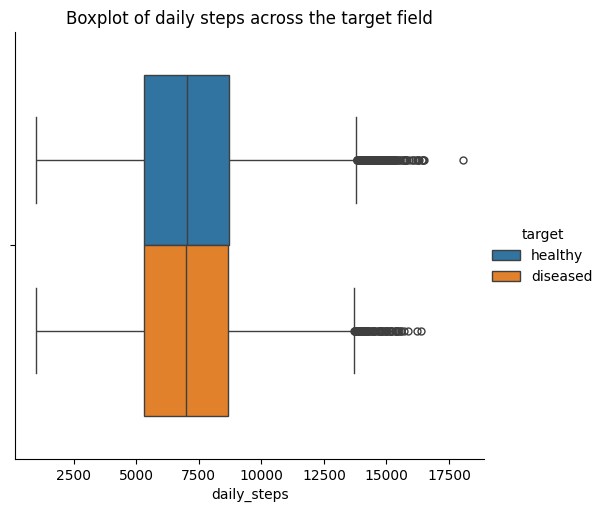

In [11]:
sns.catplot(kind = 'box',
            hue = 'target',
            x = 'daily_steps',
            data = health_data)
plt.title('Boxplot of daily steps across the target field')
plt.show()

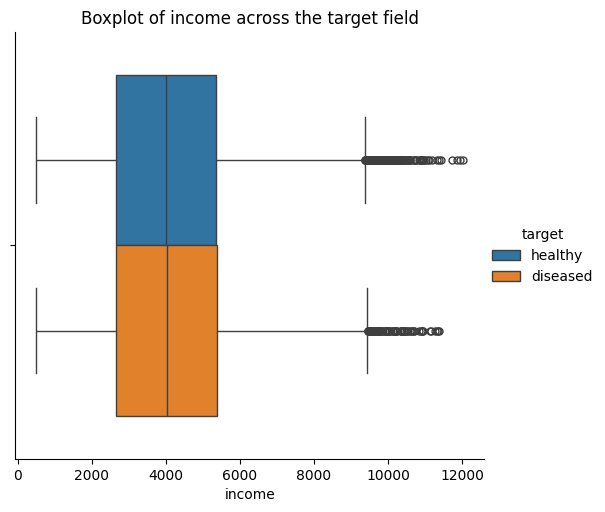

In [12]:
sns.catplot(kind = 'box',
            hue = 'target',
            x = 'income',
            data = health_data)
plt.title('Boxplot of income across the target field')
plt.show()

Due to the fact that the numerical variables have similar behaviour across the target variable, in which, the distributions are similar across both target groups, imputing with the overall median for each numerical variable with missing data is a reasonable approach to avoid introducing significant skew or bias into the dataset. It helps preserve the overall distribution shape and relationships with other variables.


In [13]:
# Imputation with the median
numerical_cols = ['insulin', 'heart_rate', 'income', 'daily_steps', 'blood_pressure', 'gene_marker_flag']

for col in numerical_cols:
  health_data[col].fillna(health_data[col].median(), inplace = True)

/tmp/ipython-input-407014143.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  health_data[col].fillna(health_data[col].median(), inplace = True)


In [14]:
# Checking if there is any missing values in the dataset

missing_values = health_data.isna().sum().sort_values(ascending = False)
display(missing_values[missing_values > 1]) # Display just the fields with missing values, exclude the rest

,0


## **Cleaning the dtypes**

Now that there are no missing values in the dataset, the next step is to convert the object fields to category (if applicable) and ensure that all fields have the correct data type for further analysis. This also helps to optimize memory usage.

In [15]:
# Checking the dataset info

health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            100000 non-null  float64
 11  heart_rate                100000 non-null  float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

Before any change in the dtypes, the dataset has over 36 MB of memory usage.

In [16]:
# Checking the amount of unique values per object column

for col in health_data.columns:
  if health_data[col].dtype == 'object':
    print(f'Unique values of {col}', health_data[col].unique())

Unique values of gender ['Male' 'Female']
Unique values of sleep_quality ['Fair' 'Good' 'Poor' 'Excellent']
Unique values of alcohol_consumption ['Unknown' 'Regularly' 'Occasionally']
Unique values of smoking_level ['Non-smoker' 'Light' 'Heavy']
Unique values of mental_health_support ['No' 'Yes']
Unique values of education_level ['PhD' 'High School' 'Master' 'Bachelor']
Unique values of job_type ['Tech' 'Office' 'Labor' 'Unemployed' 'Service' 'Healthcare']
Unique values of occupation ['Farmer' 'Engineer' 'Teacher' 'Doctor' 'Driver' 'Artist']
Unique values of diet_type ['Vegan' 'Vegetarian' 'Omnivore' 'Keto']
Unique values of exercise_type ['Strength' 'Cardio' 'Mixed' 'Unknown']
Unique values of device_usage ['High' 'Moderate' 'Low']
Unique values of healthcare_access ['Poor' 'Moderate' 'Good']
Unique values of insurance ['No' 'Yes']
Unique values of sunlight_exposure ['High' 'Low' 'Moderate']
Unique values of caffeine_intake ['Moderate' 'High' 'Unknown']
Unique values of family_history

In all object columns there are a finite number of categories, the change of the dtype is made in all of those columns for that reason:

In [17]:
# Categories that have order

sleep_quality_cats = ['Poor', 'Fair', 'Good', 'Excellent']
smoking_level_cats = ['Non-smoker', 'Light', 'Heavy']
education_level_cats = ['High School', 'Bachelor', 'Master', 'PhD']
device_usage_cats = ['Low', 'Moderate', 'High']
sunlight_cats = ['Low', 'Moderate', 'High']

# Giving order to the category fields above

health_data['sleep_quality'] = pd.Categorical(health_data['sleep_quality'],
                                              categories = sleep_quality_cats,
                                              ordered = True)

health_data['smoking_level'] = pd.Categorical(health_data['smoking_level'],
                                              categories = smoking_level_cats,
                                              ordered = True)

health_data['education_level'] = pd.Categorical(health_data['education_level'],
                                              categories = education_level_cats,
                                              ordered = True)

health_data['device_usage'] = pd.Categorical(health_data['device_usage'],
                                              categories = device_usage_cats,
                                              ordered = True)

health_data['sunlight_exposure'] = pd.Categorical(health_data['sunlight_exposure'],
                                              categories = sunlight_cats,
                                              ordered = True)


In [18]:
for col in health_data.columns:
  if health_data[col].dtype == 'object':
    #converting the columns to category
    health_data[col] = health_data[col].astype('category')

health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   survey_code               100000 non-null  int64   
 1   age                       100000 non-null  int64   
 2   gender                    100000 non-null  category
 3   height                    100000 non-null  float64 
 4   weight                    100000 non-null  float64 
 5   bmi                       100000 non-null  float64 
 6   bmi_estimated             100000 non-null  float64 
 7   bmi_scaled                100000 non-null  float64 
 8   bmi_corrected             100000 non-null  float64 
 9   waist_size                100000 non-null  float64 
 10  blood_pressure            100000 non-null  float64 
 11  heart_rate                100000 non-null  float64 
 12  cholesterol               100000 non-null  float64 
 13  glucose                   1000

Now that the data types have been corrected and given an appropriate order where applicable, the entire dataset is clean and ready for Exploratory Data Analysis (EDA) and machine learning model building. Additionally, the memory usage has decreased to 24.6 MB, a reduction of approximately 36%, significantly improving efficiency.



---

# **Exploratory Data Analysis (EDA)**

## **Analysis of physiological factors**

The first analysis performed is made over the physiological factors such as the BMI, glucose level, insulin level, and other on disease risk.

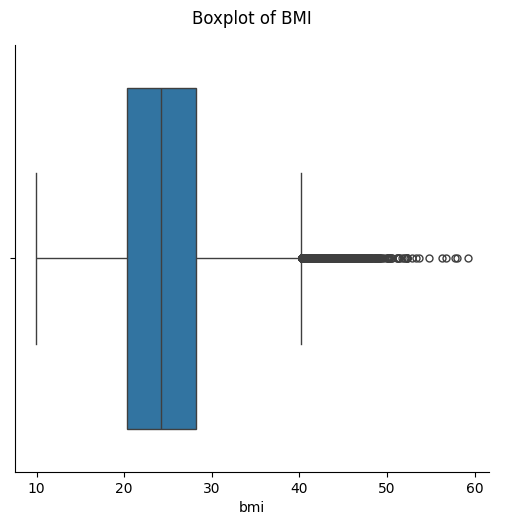

In [19]:
## Getting to know the distribution of some of the numerical variables in the set

# Boxplot of the BMI
sns.catplot(data = health_data,
            kind = 'box',
            x = 'bmi')
plt.title('Boxplot of BMI', y = 1.03)
plt.show()



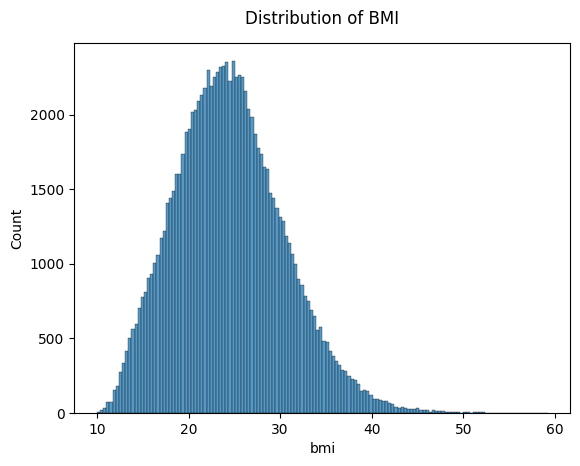

In [20]:
# Distribution of the BMI
sns.histplot(data = health_data,
            x = 'bmi')
plt.title('Distribution of BMI', y = 1.03)
plt.show()

The BMI (*Body Mass index*) is a medical screening tool that measures the ratio of your height to your weight to estimate the amount of body fat you have. It is calculated by:

$$ \text{BMI} = \frac{\text{weight in kilograms}}{(\text{height in meters})^2} $$

* Underweight: BMI less than 18.5.
* Normal weight: BMI between 18.5 and 24.9.
* Overweight: BMI between 25 and 29.9.
* Obesity: BMI of 30 or higher.


Across the dataset, the mayority of the individuals fall in the normal weight and in the overweight category, based on the results of the BMI. Also, all the outliers present in the dataset are people who have obesity.



In [21]:
# Creating a BMI category column
labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obesity']

# Cutting the data and creating the category
health_data['bmi_category'] = pd.cut(health_data['bmi'],
                                     labels = labels,
                                     bins = [0, 18.5, 24.9, 29.9, float('inf')])

health_data['bmi_category'] = pd.Categorical(health_data['bmi_category'], categories=labels, ordered=True)



In [22]:
# Comparing the age across the bmi categories

health_data.groupby('bmi_category')['age'].describe()

/tmp/ipython-input-2702153945.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_data.groupby('bmi_category')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
bmi_category,,,,,,,,
Underweight,15984.0,48.339527,17.913573,18.0,33.0,48.0,64.0,79.0
Normal Weight,39011.0,48.475481,17.879913,18.0,33.0,48.0,64.0,79.0
Overweight,27168.0,48.550280,17.900007,18.0,33.0,48.0,64.0,79.0
Obesity,17837.0,48.766553,17.856355,18.0,33.0,49.0,64.0,79.0


In [23]:
# Comparing the stress level across the bmi categories

health_data.groupby('bmi_category')['stress_level'].describe()

/tmp/ipython-input-282881319.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_data.groupby('bmi_category')['stress_level'].describe()


,count,mean,std,min,25%,50%,75%,max
bmi_category,,,,,,,,
Underweight,15984.0,4.989177,3.168989,0.0,2.0,5.0,8.0,10.0
Normal Weight,39011.0,4.994796,3.140134,0.0,2.0,5.0,8.0,10.0
Overweight,27168.0,4.982921,3.162685,0.0,2.0,5.0,8.0,10.0
Obesity,17837.0,5.000000,3.163359,0.0,2.0,5.0,8.0,10.0


In [24]:
# Comparing sleep hours across bmi categories

health_data.groupby('bmi_category')['sleep_hours'].describe()

/tmp/ipython-input-826014065.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_data.groupby('bmi_category')['sleep_hours'].describe()


,count,mean,std,min,25%,50%,75%,max
bmi_category,,,,,,,,
Underweight,15984.0,6.971772,1.507362,3.0,5.947018,6.958733,8.002090,12.0
Normal Weight,39011.0,7.008717,1.494363,3.0,6.000775,7.009919,8.022156,12.0
Overweight,27168.0,6.995400,1.494675,3.0,5.984461,6.980310,8.018129,12.0
Obesity,17837.0,7.024495,1.495608,3.0,5.998313,7.031346,8.030839,12.0


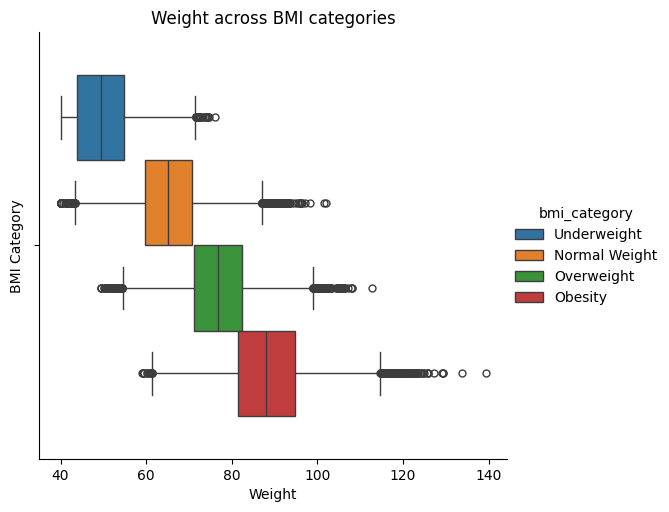

In [25]:
# Comparing the weight across the bmi categories

sns.catplot(data = health_data,
            x = 'weight',
            hue = 'bmi_category',
            kind = 'box')

plt.title('Weight across BMI categories')
plt.xlabel('Weight')
plt.ylabel('BMI Category')
plt.show()



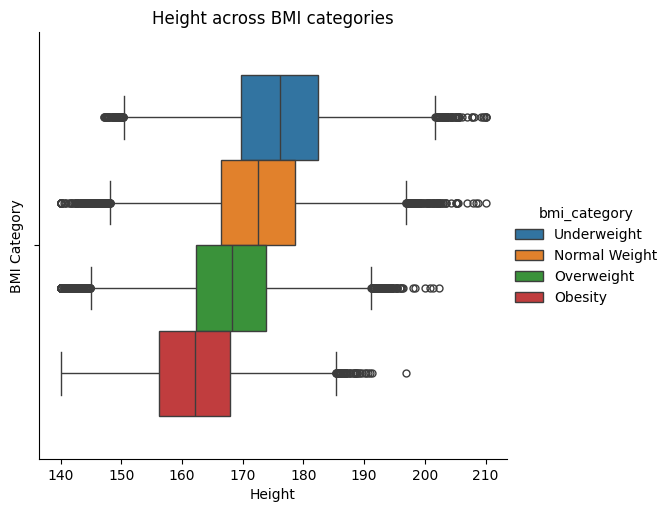

In [26]:
# Comparing height across the bmi categories
sns.catplot(data = health_data,
            x = 'height',
            hue = 'bmi_category',
            kind = 'box')

plt.title('Height across BMI categories')
plt.xlabel('Height')
plt.ylabel('BMI Category')
plt.show()

An interesting observation from these plots is that taller individuals tend to have relatively lower weights, while shorter individuals tend to be heavier. This difference in the height-weight ratio could explain why shorter individuals are categorized as obese based on their BMI, even if other factors like age, sleep hours, and stress levels have similar distributions across all BMI categories.

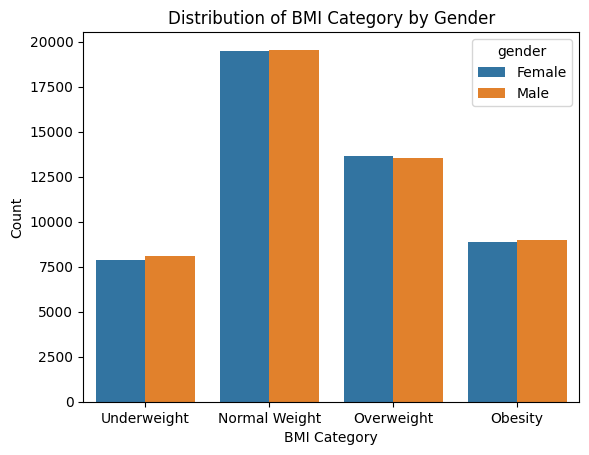

In [27]:
 # Analyzing based on BMI category
sns.countplot(data = health_data,
              x = 'bmi_category',
              hue = 'gender')

plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Category by Gender')
plt.show()

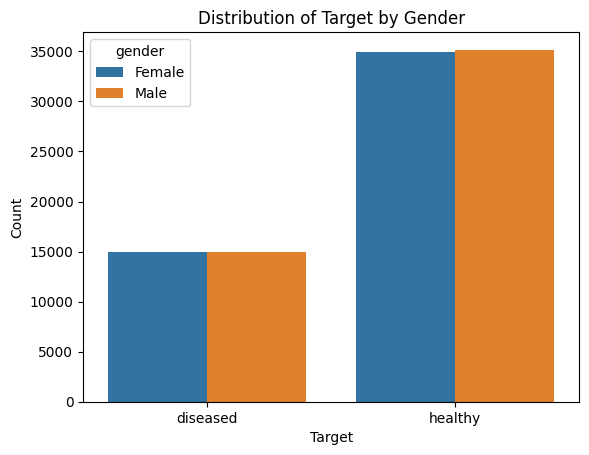

In [28]:
# Gender count between healthy and unhealthy individuals
sns.countplot(data = health_data,
              x = 'target',
              hue = 'gender')

plt.title('Distribution of Target by Gender')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

The proportions of Male/Female individuals is almost the same. Around 50%, and this proportion is the same in the BMI categories as well as the target variable. The gender doesn´t seem to be a significant variable in the category of the BMI or the target variable.

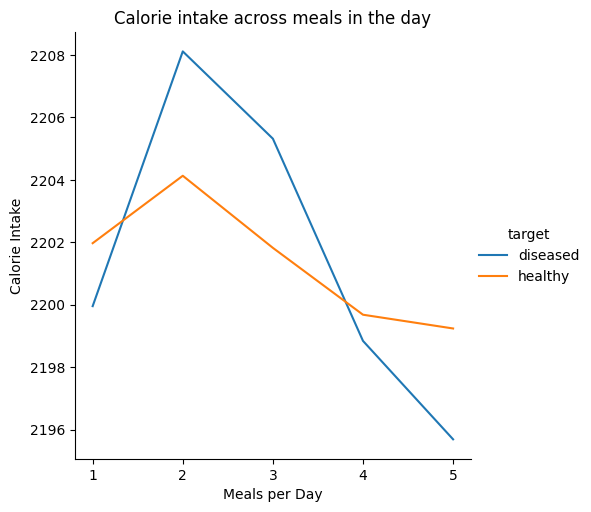

In [29]:
# Relationship between the meals per day and the calorie intake

sns.relplot(data = health_data,
            x = 'meals_per_day',
            y = 'calorie_intake',
            hue = 'target',
            kind = 'line',
            errorbar=None
            )

plt.title('Calorie intake across meals in the day')
plt.xlabel('Meals per Day')
plt.ylabel('Calorie Intake')
plt.xticks(range(1, 6))
plt.show()

Both healthy and deseased individuals have a peak in calorie intake when they only have two meals per day, and when the amount of meals increases, the calorie intake decrease gradually. However, is noticeable in the diseased individuals the low amount of calories consumed in the day.

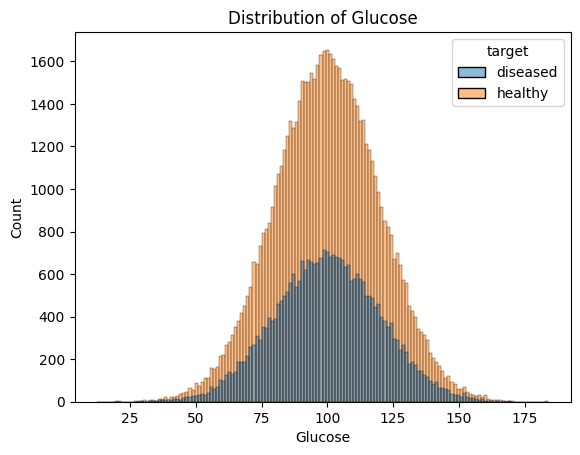

In [30]:
sns.histplot(data = health_data,
            x = 'glucose',
            hue = 'target')

plt.title('Distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

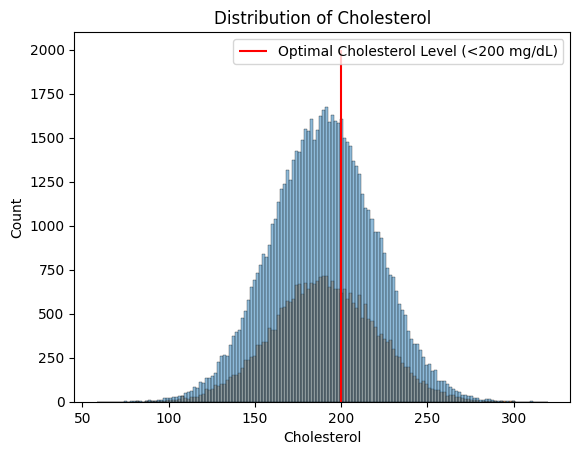

In [31]:
sns.histplot(data = health_data,
            x = 'cholesterol',
            hue = 'target',
            hue_order=['healthy', 'diseased']) # Add hue_order to ensure correct legend labels

plt.title('Distribution of Cholesterol')
plt.vlines(x = 200, ymin = 0, ymax = 2000, colors = 'red', label='Optimal Cholesterol Level (<200 mg/dL)')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.legend()
plt.show()

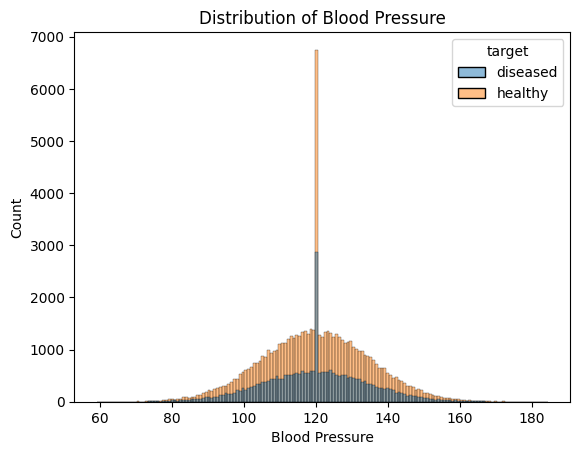

In [32]:
sns.histplot(data = health_data,
            x = 'blood_pressure',
            hue = 'target')

plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

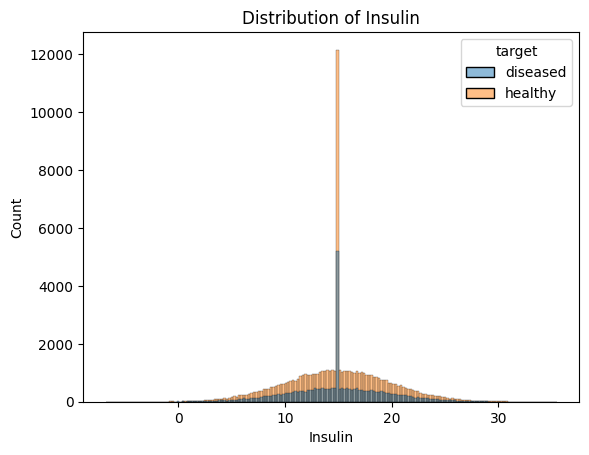

In [33]:
sns.histplot(data = health_data,
            x = 'insulin',
            hue = 'target')

plt.title('Distribution of Insulin')
plt.xlabel('Insulin')
plt.ylabel('Count')
plt.show()



*   Normal blood glucose (sugar) levels generally range from 70 to 100 mg/dL (3.9 to 5.5 mmol/L) when fasting. These levels can fluctuate throughout the day, particularly after eating, but typically should not exceed 125 mg/dL (6.9 mmol/L) two hours after a meal. Deviations from this range, either too high (hyperglycemia) or too low (hypoglycemia)

*   Cholesterol levels are measured in milligrams per deciliter (mg/dL) and are categorized as optimal, near optimal/above optimal, borderline high, high, or very high. Optimal levels for total cholesterol are generally below 200 mg/dL, while LDL cholesterol (the "bad" cholesterol) should ideally be below 100 mg/dL


*   Blood pressure is categorized into different levels: normal, elevated, and high (hypertension) stages 1 and 2. Normal blood pressure is generally considered to be less than 120/80 mmHg. Elevated blood pressure is 120-129 systolic and less than 80 diastolic. High blood pressure (hypertension) is categorized as Stage 1 (130-139 systolic or 80-89 diastolic) and Stage 2 (140 or higher systolic or 90 or higher diastolic.

*   Normal insulin levels vary, but generally, fasting insulin levels are between 2 and 25 mU/L. After eating, insulin levels can rise significantly, but typically stay below 50 mU/L.




Based on the distributions observed in the plots, individual analysis of glucose, cholesterol, blood pressure, and insulin levels does not appear to be significantly different between healthy and diseased individuals. The distributions for both groups tend to cluster around the normal values for each metric, suggesting that these physiological factors, when considered in isolation, are not strong predictors of disease status in this dataset. Their influence on disease likelihood might be more apparent when analyzed in combination with other factors or through more sophisticated modeling techniques.



---
## **Analysis of lifestyle factors**

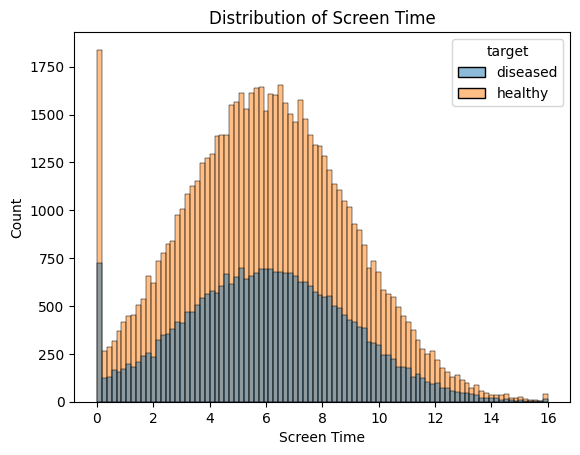

In [34]:
# Distribution of the screen time

sns.histplot(data = health_data,
            x = 'screen_time',
            hue = 'target')

plt.title('Distribution of Screen Time')
plt.xlabel('Screen Time')
plt.ylabel('Count')
plt.show()



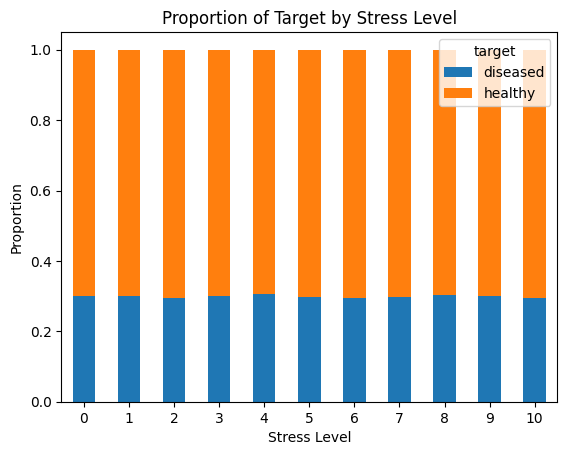

In [35]:
# Calculate proportions for stacked bar plot
stress_proportion = health_data.groupby('stress_level')['target'].value_counts(normalize=True).unstack()

# Plot stacked bar chart of stress level proportions
stress_proportion.plot(kind='bar', stacked=True)
plt.title('Proportion of Target by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

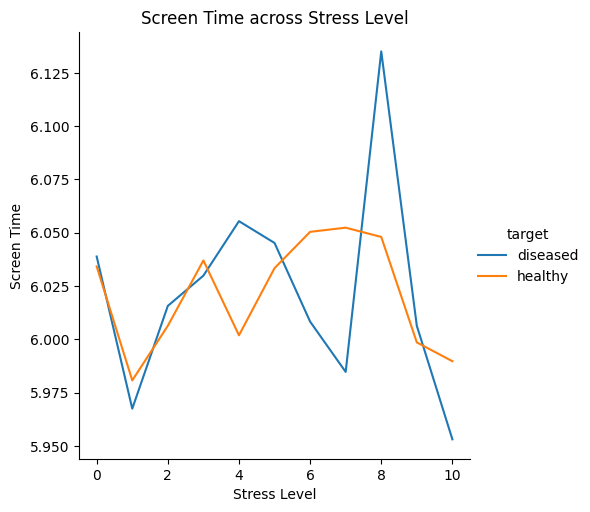

In [36]:
# Plotting the screen time v the stress levels

sns.relplot(data = health_data,
            x = 'stress_level',
            y = 'screen_time',
            hue = 'target',
            kind = 'line',
            errorbar=None)

plt.title('Screen Time across Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Screen Time')
plt.show()

Based on the plots above, the distribution of screen time appears similar for both healthy and diseased individuals. Additionally, when examining the proportion of healthy and diseased individuals across different stress levels, there isn't a significant variation. This suggests that neither screen time nor stress level, when considered in isolation, are strong indicators for predicting the target variable (disease status) in this dataset. Their distributions and proportions are quite similar between the healthy and diseased groups.

An interesting analysis from the "Screen time across stress level" plot is the fact that the individuals with a disease have a peak in the screen time with a stress level of 8. This suggest a tendency in using the screen time as a way to face the stress levels. However, when they have extremely high stress levels the screen time decreases dramatically, showing that these people in that stress level use different methods to face the stress and exhaustion rather than to use the phone.

## **Hypothesis testing over the data**

In this section, we complete analysis on the data doing hypothesis testing. By doing so, we can look further into hidden relationships in the data, and understand the relationship to know whats going on, and to not infer that the relationships are due to randomness (corregir redaccion)